# Face recognition

In [1]:
from PIL import Image
import cv2
import numpy as np

In [2]:
from matplotlib import pyplot as plt

def show_image(image):
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    plt.imshow(image_rgb) 
    plt.axis('off') 
    plt.show() 

In [3]:
## Reading a compressed file
# import zipfile
# path = '../datasets/yalefaces.zip'
# zip_object = zipfile.ZipFile(file=path, mode = 'r')
# zip_object.extractall('../datasets')
# zip_object.close()

## Preprocessing the images

In [4]:
import os
def get_image_data():
    paths = [os.path.join('../datasets/yalefaces/train/', f) for f in os.listdir('../datasets/yalefaces/train')]
    faces = []
    ids = []

    for path in paths:
        image = Image.open(path).convert('L') # L - single channel image (grayscale)
        image_np = np.array(image, 'uint8')
        id = int(os.path.split(path)[1].split('.')[0].replace('subject', ''))
        ids.append(id)
        faces.append(image_np)
    return np.array(ids), faces


In [5]:
'''
if we look at the shape we can see  all the images have the same size, and if they don't have we need to resize it
'''
ids, faces = get_image_data()

## Training the LBPH classifier

In [6]:
#By dafault each one of the images will have 64 histograms, because the image will me divided in 8 rows and 8 cols
lbph_classifier = cv2.face.LBPHFaceRecognizer_create()
lbph_classifier.train(faces, ids)
lbph_classifier.write('../classifiers/lbph_classifier.yml')

## Recognizing faces

In [7]:
lbph_face_classifier = cv2.face.LBPHFaceRecognizer_create()
lbph_face_classifier.read('../classifiers/lbph_classifier.yml')

In [8]:
test_image = '../datasets/yalefaces/test/subject10.sad.gif'
image = Image.open(test_image).convert('L')
image_np = np.array(image, 'uint8')

In [9]:
prediction = lbph_face_classifier.predict(image_np)
prediction # return the class and the confidence

(10, 6.384336446373091)

In [10]:
expected_output = int(os.path.split(test_image)[1].split('.')[0].replace('subject', ''))
expected_output

10

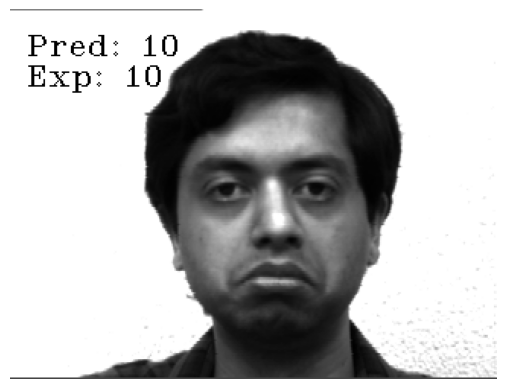

In [11]:
cv2.putText(image_np, 'Pred: ' + str(prediction[0]), (10, 30), cv2.FONT_HERSHEY_COMPLEX_SMALL, 1, (0, 255, 0))
cv2.putText(image_np, 'Exp: ' + str(expected_output), (10, 50), cv2.FONT_HERSHEY_COMPLEX_SMALL, 1, (0, 255, 0))
show_image(image_np)

## Evaluating the face classifier

In [12]:
paths = [os.path.join('../datasets/yalefaces/test/', f) for f in os.listdir('../datasets/yalefaces/test')]
predictions = []
expected_outputs = []

for path in paths:
    image = Image.open(path).convert('L')
    image_np = np.array(image, 'uint8')
    prediction, _ = lbph_face_classifier.predict(image_np)
    expected_output = int(os.path.split(path)[1].split('.')[0].replace('subject', ''))
    
    predictions.append(prediction)
    expected_outputs.append(expected_output)
predictions = np.array(predictions)
expected_outputs = np.array(expected_outputs)

In [13]:
from sklearn.metrics import accuracy_score
accuracy_score(expected_outputs, predictions)

0.6666666666666666

<Axes: >

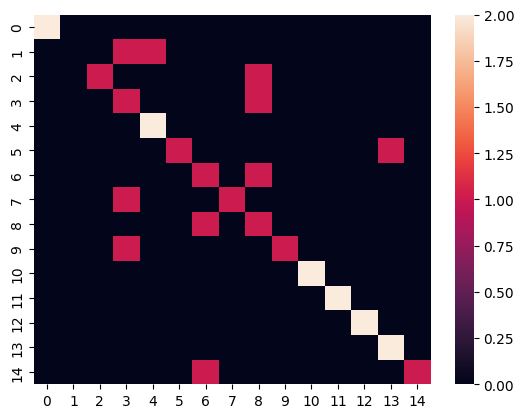

In [17]:
from sklearn.metrics import confusion_matrix
import seaborn
cm = confusion_matrix(expected_outputs, predictions)
seaborn.heatmap(cm)

## LBPH parameters